### I. Preprocessing.

Load the data.

In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_fdf52831014b446a9805fd013e418ce3.csv"
df=pd.read_csv(url)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,15.82,16.72,15.78,16.42,242963398,-4.42849,1.380223,239655616.0,16.71,15.97,-2.470660,19,0.187852
2,1,AA,1/21/2011,15.82,16.72,15.78,16.42,138428495,-2.47066,-43.024959,242963398.0,16.71,15.97,1.638310,12,0.189994
3,1,AA,1/28/2011,15.82,16.72,15.78,16.42,151379173,1.63831,9.355500,138428495.0,16.71,15.97,5.933250,5,0.185989
4,1,AA,2/4/2011,15.82,16.72,15.78,16.42,154387761,5.93325,1.987452,151379173.0,16.71,15.97,0.230814,97,0.175029


In [2]:
df.shape

(750, 16)

Display the rows with null values.

In [3]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
25,1,AXP,1/7/2011,15.82,16.72,15.78,16.42,45102042,2.448040,NaN,NaN,16.71,15.97,4.638010,89,0.405771
50,1,BA,1/7/2011,15.82,16.72,15.78,16.42,36258120,4.882840,NaN,NaN,16.71,15.97,0.936330,33,0.605362
75,1,BAC,1/7/2011,15.82,16.72,15.78,16.42,1453438639,2.888090,NaN,NaN,16.71,15.97,7.621740,54,0.070175
100,1,CAT,1/7/2011,15.82,16.72,15.78,16.42,24135903,-0.688705,NaN,NaN,16.71,15.97,0.858277,11,0.469433


In [4]:
print("The rows for which the target value is null consists of ",len(rows_with_NaN)/len(df)*100,"% of the data.")

The rows for which the target value is null consists of  4.0 % of the data.


Replace the null values with their corresponding column mean.

In [5]:
mean_volume=df[["percent_change_volume_over_last_wk"]].mean()
mean_volume

percent_change_volume_over_last_wk    5.593627
dtype: float64

In [6]:
df_volume=df[["percent_change_volume_over_last_wk"]].fillna(mean_volume)
df_volume.head()

,percent_change_volume_over_last_wk
0,5.593627
1,1.380223
2,-43.024959
3,9.355500
4,1.987452


In [7]:
previous_mean=df[["previous_weeks_volume"]].mean()
previous_mean

previous_weeks_volume    1.173876e+08
dtype: float64

In [8]:
previous_mean=df[["previous_weeks_volume"]].fillna(previous_mean)
previous_mean.head()

,previous_weeks_volume
0,1.173876e+08
1,2.396556e+08
2,2.429634e+08
3,1.384285e+08
4,1.513792e+08


In [9]:
df_sub=df.drop(["percent_change_volume_over_last_wk","previous_weeks_volume"],axis=1)
df=pd.concat([df_sub,df_volume,previous_mean],axis=1)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk,previous_weeks_volume
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,-4.428490,26,0.182704,5.593627,1.173876e+08
1,1,AA,1/14/2011,15.82,16.72,15.78,16.42,242963398,-4.42849,16.71,15.97,-2.470660,19,0.187852,1.380223,2.396556e+08
2,1,AA,1/21/2011,15.82,16.72,15.78,16.42,138428495,-2.47066,16.71,15.97,1.638310,12,0.189994,-43.024959,2.429634e+08
3,1,AA,1/28/2011,15.82,16.72,15.78,16.42,151379173,1.63831,16.71,15.97,5.933250,5,0.185989,9.355500,1.384285e+08
4,1,AA,2/4/2011,15.82,16.72,15.78,16.42,154387761,5.93325,16.71,15.97,0.230814,97,0.175029,1.987452,1.513792e+08


This data set is downloaded from UCI's Machine Learning Repository. It is stated on the website that that the associated tasks are classification and clustering. All attributes, excluding "quarter", "stock" and "date" are floats. There are more than one way to turn transform this dataset and make it suitable for classification task. One way is to replace the negative values in "percent_change_next_weeks_price" with 0 and positive values with 1. That way, we have a binary classification task. 

In [10]:
import numpy as np
df['percent_change_next_weeks_price'] = np.where((df.percent_change_next_weeks_price>0),1,df.percent_change_next_weeks_price)
df['percent_change_next_weeks_price'] = np.where((df.percent_change_next_weeks_price<0),0,df.percent_change_next_weeks_price)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk,previous_weeks_volume
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,0.0,26,0.182704,5.593627,1.173876e+08
1,1,AA,1/14/2011,15.82,16.72,15.78,16.42,242963398,-4.42849,16.71,15.97,0.0,19,0.187852,1.380223,2.396556e+08
2,1,AA,1/21/2011,15.82,16.72,15.78,16.42,138428495,-2.47066,16.71,15.97,1.0,12,0.189994,-43.024959,2.429634e+08
3,1,AA,1/28/2011,15.82,16.72,15.78,16.42,151379173,1.63831,16.71,15.97,1.0,5,0.185989,9.355500,1.384285e+08
4,1,AA,2/4/2011,15.82,16.72,15.78,16.42,154387761,5.93325,16.71,15.97,1.0,97,0.175029,1.987452,1.513792e+08


In [11]:
df=df.drop(["quarter","stock","date"],axis=1)
df.head()

,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk,previous_weeks_volume
0,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,0.0,26,0.182704,5.593627,1.173876e+08
1,15.82,16.72,15.78,16.42,242963398,-4.42849,16.71,15.97,0.0,19,0.187852,1.380223,2.396556e+08
2,15.82,16.72,15.78,16.42,138428495,-2.47066,16.71,15.97,1.0,12,0.189994,-43.024959,2.429634e+08
3,15.82,16.72,15.78,16.42,151379173,1.63831,16.71,15.97,1.0,5,0.185989,9.355500,1.384285e+08
4,15.82,16.72,15.78,16.42,154387761,5.93325,16.71,15.97,1.0,97,0.175029,1.987452,1.513792e+08


In [12]:
X=df.drop(["percent_change_next_weeks_price"],axis=1)
X.head()

,open,high,low,close,volume,percent_change_price,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_volume_over_last_wk,previous_weeks_volume
0,15.82,16.72,15.78,16.42,239655616,3.79267,16.71,15.97,26,0.182704,5.593627,1.173876e+08
1,15.82,16.72,15.78,16.42,242963398,-4.42849,16.71,15.97,19,0.187852,1.380223,2.396556e+08
2,15.82,16.72,15.78,16.42,138428495,-2.47066,16.71,15.97,12,0.189994,-43.024959,2.429634e+08
3,15.82,16.72,15.78,16.42,151379173,1.63831,16.71,15.97,5,0.185989,9.355500,1.384285e+08
4,15.82,16.72,15.78,16.42,154387761,5.93325,16.71,15.97,97,0.175029,1.987452,1.513792e+08


In [13]:
y=df[["percent_change_next_weeks_price"]]
y.head()

,percent_change_next_weeks_price
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


We are not going to perform the clustering analysis using all attributes. Instead, we are going to perform the clustering analysis using just the most relevant features.

In [14]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

C:\Users\kensh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,scores
7,0.046429
8,0.030956
1,0.029063
5,0.028200
0,0.008698
11,0.007007
3,0.004598
2,0.001764
4,0.000000
6,0.000000


In [16]:
features=scores[scores["scores"]>0]
features

,scores
7,0.046429
8,0.030956
1,0.029063
5,0.028200
0,0.008698
11,0.007007
3,0.004598
2,0.001764


In [17]:
X=X.iloc[:,features.index]
X.head()

,next_weeks_close,days_to_next_dividend,high,percent_change_price,open,previous_weeks_volume,close,low
0,15.97,26,16.72,3.79267,15.82,1.173876e+08,16.42,15.78
1,15.97,19,16.72,-4.42849,15.82,2.396556e+08,16.42,15.78
2,15.97,12,16.72,-2.47066,15.82,2.429634e+08,16.42,15.78
3,15.97,5,16.72,1.63831,15.82,1.384285e+08,16.42,15.78
4,15.97,97,16.72,5.93325,15.82,1.513792e+08,16.42,15.78


We see that if we approach this dataset as a binary classification task, i.e., whether the index's return next week will be positive or negative, the most relevant features are: previous_week_volumn, open, low, close, days_to_next_dividend.

Standardize X.

In [18]:
from sklearn import preprocessing
X=pd.DataFrame(preprocessing.StandardScaler().fit_transform(X),columns=X.columns)
X.head()

,next_weeks_close,days_to_next_dividend,high,percent_change_price,open,previous_weeks_volume,close,low
0,-1.0,-0.572849,0.0,1.487366,1.0,-9.557743e-17,-1.0,1.0
1,-1.0,-0.724024,0.0,-1.780016,1.0,7.842381e-01,-1.0,1.0
2,-1.0,-0.875198,0.0,-1.001905,1.0,8.054545e-01,-1.0,1.0
3,-1.0,-1.026372,0.0,0.631147,1.0,1.349580e-01,-1.0,1.0
4,-1.0,0.960489,0.0,2.338109,1.0,2.180248e-01,-1.0,1.0


### II. Clustering analysis

We really do not know that for this particular dataset, which algorithm is the best, so we will try all of the clustering algorithms in sklearn library and pick the most suitable one.

In [19]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters=np.arange(2,16)
silhouette=[]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)
    silhouette.append(silhouette_avg)

For n_clusters = 2  ,the average silhouette_score is : 0.44413901759880164
For n_clusters = 3  ,the average silhouette_score is : 0.5453754688776393
For n_clusters = 4  ,the average silhouette_score is : 0.3141211266333347
For n_clusters = 5  ,the average silhouette_score is : 0.2831316516573661
For n_clusters = 6  ,the average silhouette_score is : 0.29319003085437906
For n_clusters = 7  ,the average silhouette_score is : 0.29232222149096926
For n_clusters = 8  ,the average silhouette_score is : 0.286009338895651
For n_clusters = 9  ,the average silhouette_score is : 0.27860469860082154
For n_clusters = 10  ,the average silhouette_score is : 0.2917928681102809
For n_clusters = 11  ,the average silhouette_score is : 0.2904482865277302
For n_clusters = 12  ,the average silhouette_score is : 0.29699975679732876
For n_clusters = 13  ,the average silhouette_score is : 0.28427657476146984
For n_clusters = 14  ,the average silhouette_score is : 0.2848419214420054
For n_clusters = 15  ,the av

In [20]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import davies_bouldin_score


clusterer = AffinityPropagation(damping=0.8)
cluster_labels = clusterer.fit_predict(X)
davies_bouldin_score = davies_bouldin_score(X, cluster_labels)
score=silhouette_score(X, cluster_labels,metric='euclidean')
print("The number of cluster is: ",len(np.unique(cluster_labels)))
print("The Davies Bouldin score is: ",davies_bouldin_score)
print("The Silhouette score is: ",score)

C:\Users\kensh\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


The number of cluster is:  44
The Davies Bouldin score is:  0.8723307056554475
The Silhouette score is:  0.2818496939493693


In [21]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.9, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels=ms.fit_predict(X)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("The number of clusters is: ",n_clusters_)
print("The silhouette score is: ",silhouette_score(X, labels))

The number of clusters is:  2
The silhouette score is:  0.6205455040897937


In [22]:
from sklearn.cluster import SpectralClustering

n_clusters=np.arange(2,13)

for n_clusters in n_clusters:
    clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize",random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)

For n_clusters = 2  ,the average silhouette_score is : 0.6205455040897937
For n_clusters = 3  ,the average silhouette_score is : 0.6020957473165068
For n_clusters = 4  ,the average silhouette_score is : 0.5593134589362511
For n_clusters = 5  ,the average silhouette_score is : 0.5430128424891093
For n_clusters = 6  ,the average silhouette_score is : 0.48185548545432355
For n_clusters = 7  ,the average silhouette_score is : 0.457405196982306
For n_clusters = 8  ,the average silhouette_score is : 0.4497950603845106
For n_clusters = 9  ,the average silhouette_score is : 0.4675131815750036
For n_clusters = 10  ,the average silhouette_score is : 0.4379912706302885
For n_clusters = 11  ,the average silhouette_score is : 0.4335310396915713
For n_clusters = 12  ,the average silhouette_score is : 0.36774929928875905


In [23]:
from sklearn.cluster import AgglomerativeClustering

n_clusters=np.arange(2,13)
for n_clusters in n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)

For n_clusters = 2  ,the average silhouette_score is : 0.6205455040897937
For n_clusters = 3  ,the average silhouette_score is : 0.6020957473165068
For n_clusters = 4  ,the average silhouette_score is : 0.268422491898575
For n_clusters = 5  ,the average silhouette_score is : 0.26156711481686346
For n_clusters = 6  ,the average silhouette_score is : 0.1937707802330995
For n_clusters = 7  ,the average silhouette_score is : 0.22430488265080212
For n_clusters = 8  ,the average silhouette_score is : 0.22277772600882545
For n_clusters = 9  ,the average silhouette_score is : 0.22320155196096736
For n_clusters = 10  ,the average silhouette_score is : 0.22643682316000316
For n_clusters = 11  ,the average silhouette_score is : 0.2283501724919313
For n_clusters = 12  ,the average silhouette_score is : 0.2126543443828172


In [24]:
from sklearn.cluster import OPTICS
clust = OPTICS()
labels=clust.fit_predict(X)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("The number of clusters is: ",n_clusters_)
print("The silhouette score is: ",silhouette_score(X, labels))

The number of clusters is:  29
The silhouette score is:  -0.3526382797742092


MeanShift, SpectralClustering and AgglomerativeClustering all give us the same result: N=2 with silhouette score equal to 0.62.

In [57]:
from sklearn.cluster import SpectralClustering

n_clusters=2
clusterer = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize",random_state=0)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
print("For n_clusters =", n_clusters,
          " ,the average silhouette_score is :", silhouette_avg,)

For n_clusters = 2  ,the average silhouette_score is : 0.6205455040897937


Let's visualize the clusters. X is 6 dimensional. **We cannot visualize 6 dimensions, but we can use PCA to project the dimensions into 3D and visualize it in 3D.**

In [58]:
from sklearn.decomposition import PCA

pca=pd.DataFrame(PCA(n_components=3).fit_transform(X)).rename(columns={0:"x",1:"y",2:"z"})
labels=pd.DataFrame(labels).rename(columns={0:"label"})
pca=pd.concat([pca,labels],axis=1)
pca.head()

,x,y,z,label
0,-0.622708,-1.315030,0.650652,0
1,1.886948,0.434718,-0.747090,0
2,1.512973,-0.130403,-0.335335,0
3,0.161379,-1.199162,0.077249,0
4,-1.616186,-0.529266,1.882724,0


In [59]:
len(pca[pca["label"]==0])

725

In [60]:
len(pca[pca["label"]==1])

25

In [61]:
pca_0=pca[pca["label"]==0]
pca_1=pca[pca["label"]==1]
x_0=pca_0[["x"]]
y_0=pca_0[["y"]]
z_0=pca_0[["z"]]
x_1=pca_1[["x"]]
y_1=pca_1[["y"]]
z_1=pca_1[["z"]]

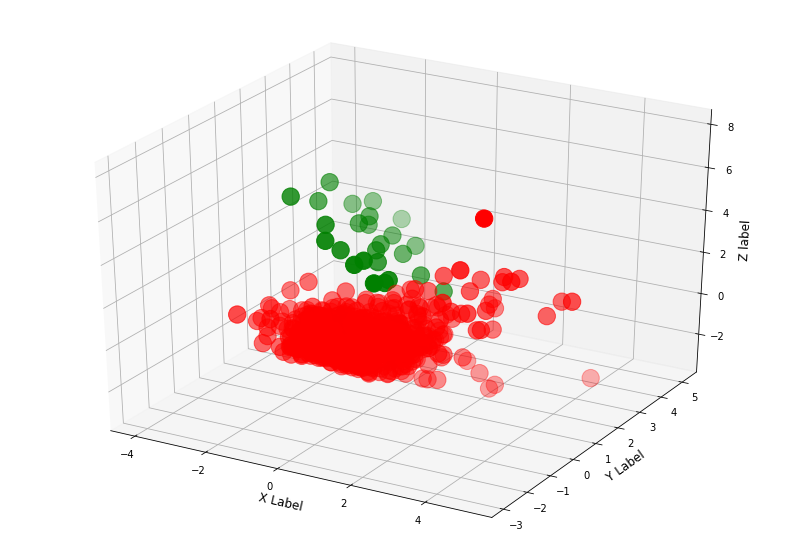

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_0, y_0, z_0,color="r",s=300)
ax.scatter(x_1,y_1,z_1,color="g",s=300)

ax.set_xlabel('X Label',fontsize=12)
ax.set_ylabel('Y Label',fontsize=12)
ax.set_zlabel('Z label',fontsize=12)

plt.show()

### III. Classification 

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)

(450, 6)
(300, 6)


In [65]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 9, verbose=2, n_jobs = -1)

In [67]:
rf_random.fit(X_train,y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 55.1min finished
C:\Users\kensh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=7,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 488, 677, 866,
                                                         1055, 1244, 1433, 1622,
                                             

In [68]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [69]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y_pred))

Accuracy on test data is:  0.5666666666666667


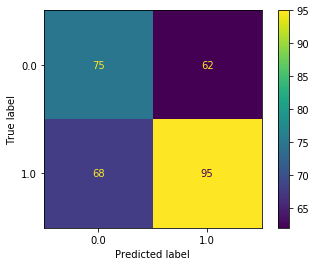

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_random, X_test, y_test)  
plt.show() 

In [71]:
from sklearn.metrics import classification_report
print("Classification report on test data: \n",classification_report(y_test,y_pred))

Classification report on test data: 
               precision    recall  f1-score   support

         0.0       0.52      0.55      0.54       137
         1.0       0.61      0.58      0.59       163

    accuracy                           0.57       300
   macro avg       0.56      0.57      0.56       300
weighted avg       0.57      0.57      0.57       300



The result is miserable.